## Importing Data and Merging 

In [1]:
import pandas as pd
import numpy as np

claims = pd.read_csv('claims.csv')
cust_demographics = pd.read_csv('cust_demographics.csv')

Claims_cust = pd.merge(claims,
                 cust_demographics,left_on='customer_id',
                 right_on='CUST_ID', how='left')


Claims_cust.loc[Claims_cust.fraudulent == 'Yes', 'fraudulent_flag'] = 1 
Claims_cust.loc[Claims_cust.fraudulent == 'No', 'fraudulent_flag'] = 0

Claims_cust.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,fraudulent_flag
0,88815908,48477164,Driver error,09-07-2017,Home,Unknown,Material and injury,$48150.5,4,Yes,48477164.0,Female,20-Oct-76,NV,572-493-8516,Silver,1.0
1,22032611,27598176,Driver error,01/13/2018,Auto,No,Material and injury,$48035.5,1,Yes,27598176.0,Female,29-Jan-65,TN,436-192-5639,Platinum,1.0
2,6429479,14501963,Driver error,10/24/2017,Auto,No,Material and injury,$47748,3,Yes,14501963.0,Male,24-Oct-80,NM,978-631-4759,Gold,1.0
3,18700750,86024944,Other driver error,07/15/2017,Auto,Unknown,Material and injury,$47679,2,Yes,86024944.0,Female,01-Aug-74,AZ,742-298-4693,Silver,1.0
4,32116508,65728108,Other causes,10-09-2018,Auto,Unknown,Material and injury,$47610,3,Yes,65728108.0,Male,22-Nov-84,SC,438-675-4587,Platinum,1.0


## Data Exploration

## 1. Calculating the proportion of fraudulent vs non fraudulent in the flag column

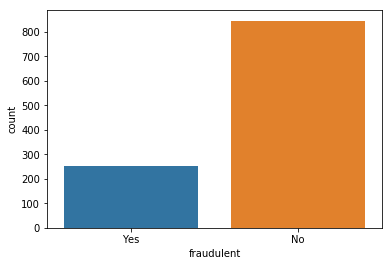

Percentage of no fraud is 76.9090909090909
Percentage of fraud 23.09090909090909


In [3]:
Claims_cust['fraudulent'].value_counts()

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

sns.countplot(x='fraudulent',data=Claims_cust)
plt.show()

count_no_fraud = len(Claims_cust[Claims_cust['fraudulent']=='No'])
count_fraud = len(Claims_cust[Claims_cust['fraudulent']=='Yes'])
pct_of_no_fraud = count_no_fraud/(count_no_fraud+count_fraud)
print("Percentage of no fraud is", pct_of_no_fraud*100)
pct_of_fraud = count_fraud/(count_no_fraud+count_fraud)
print("Percentage of fraud", pct_of_fraud*100)

## 2. Trend of Incident Cause with Fraudulent - Does Incident Cause have an impact on Fraudulent behaviour?

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd

claims_cust_yes = Claims_cust.loc[Claims_cust['fraudulent'] == 'Yes']
claims_cust_yes.count()

incident_cause_fraud = claims_cust_yes.groupby(['incident_cause'])['fraudulent'].agg('count')
incident_cause_fraud

incident_cause_fraud_2 = incident_cause_fraud.to_frame(name='claim_cause_fraud')
incident_cause_fraud_2.head()

Claims_incident_cause = Claims_cust.groupby(['incident_cause'])['fraudulent'].agg('count')
Claims_incident_cause_2 = Claims_incident_cause.to_frame(name='claim_cause_total')
Claims_incident_cause_2.head()


Claims_cust_3 = pd.merge(incident_cause_fraud_2,
                 Claims_incident_cause_2,on = 'incident_cause',
                how='left')
Claims_cust_3.head()

Claims_cust_3['fraud_perc'] = (Claims_cust_3['claim_cause_fraud']/Claims_cust_3['claim_cause_total'])*100

Claims_cust_3.head()

#plt.savefig('edu_vs_pur_stack')

,claim_cause_fraud,claim_cause_total,fraud_perc
incident_cause,,,
Crime,28,110,25.454545
Driver error,59,262,22.519084
Natural causes,40,189,21.164021
Other causes,71,290,24.482759
Other driver error,56,249,22.489960


## We observe that the fraud percentage is very similar across incident causes

## 3. Trend of Claim Area with fraudulent - Does claim area have an impact on fraudulent? 

Text(0, 0.5, 'Proportion of Frauds')

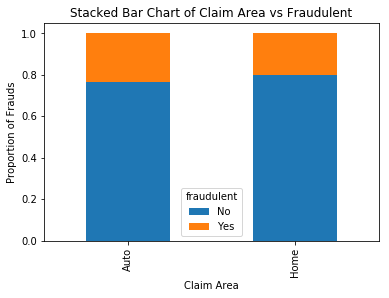

In [5]:
import pandas as pd

table=pd.crosstab(Claims_cust.claim_area,Claims_cust.fraudulent)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Claim Area vs Fraudulent')
plt.xlabel('Claim Area')
plt.ylabel('Proportion of Frauds')
#plt.savefig('edu_vs_pur_stack')


## Very minimal difference between fraudulent of auto and home

## 4. Trend of claim_type with fraudulent proportion

Text(0, 0.5, 'Proportion of Frauds')

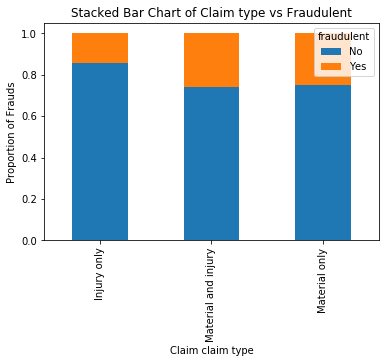

In [61]:
claim_type_fraud = claims_cust_yes.groupby(['claim_type'])['fraudulent'].agg('count')
claim_type_fraud

claim_type_fraud_2 = claim_type_fraud.to_frame(name='claim_type_fraud')
#claim_type_fraud_2.head()

Claims_type = Claims_cust.groupby(['claim_type'])['fraudulent'].agg('count')
claim_type_type_2 = Claims_type.to_frame(name='claim_type_total')
#claim_type_type_2.head()


Claims_cust_2 = pd.merge(claim_type_fraud_2,
                 claim_type_type_2,on = 'claim_type',
                how='left')
#Claims_cust.head()

Claims_cust_2['fraud_perc'] = (Claims_cust_2['claim_type_fraud']/Claims_cust_2['claim_type_total'])*100

#Claims_cust_2.head()

table=pd.crosstab(Claims_cust.claim_type,Claims_cust.fraudulent)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Claim type vs Fraudulent')
plt.xlabel('Claim claim type')
plt.ylabel('Proportion of Frauds')
#plt.savefig('edu_vs_pur_stack')



## Materials and Injury and Material Only types tend to have higher fraud percentage as compared to Injury only

## 5. Does claim_amount have an impact on fraudulent behavior? 

In [72]:
import pandas as pd

Claims_cust['claim_amount'] = Claims_cust['claim_amount'].replace('[\$,]', '', regex=True).astype(float)

claim_amount_fraud = Claims_cust.groupby(['fraudulent'])['claim_amount'].agg('mean')
claim_amount_fraud

#Claims_cust.to_csv('out.csv')

fraudulent
No     12166.595492
Yes    12879.411417
Name: claim_amount, dtype: float64

## Very similar mean of claim amount for Fraudulent and Non Fraudulent

## 6. Does Gender have an impct on Fraudulent proportion? 

Text(0, 0.5, 'Proportion of Frauds')

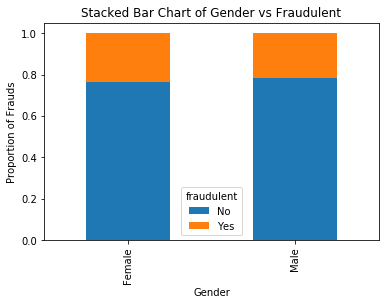

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

table=pd.crosstab(Claims_cust.gender,Claims_cust.fraudulent)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs Fraudulent')
plt.xlabel('Gender')
plt.ylabel('Proportion of Frauds')
#plt.savefig('edu_vs_pur_stack')

## Fraudulent behavior remains fairly similar for Male and Female

## 7. Does segment have an impact on Fraudulent proportion? 

Text(0, 0.5, 'Proportion of Frauds')

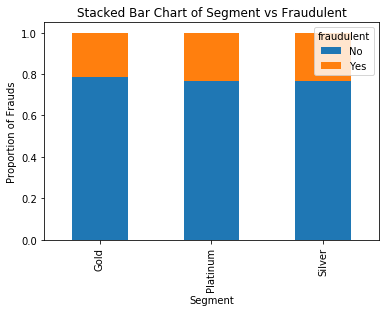

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

table=pd.crosstab(Claims_cust.Segment,Claims_cust.fraudulent)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Segment vs Fraudulent')
plt.xlabel('Segment')
plt.ylabel('Proportion of Frauds')
#plt.savefig('edu_vs_pur_stack')

## Proportion of Fraudulent is very similar across all segments

## Creating Dummy Variables through one hot encoding

In [18]:
import pandas as pd

cat_columns = ['gender','Segment','incident_cause','claim_area','claim_type','total_policy_claims']

Claims_cust_processed = pd.get_dummies(Claims_cust, prefix_sep="__",
                              columns=cat_columns)

Claims_cust_processed['claim_amount'] = Claims_cust_processed['claim_amount'].replace('[\$,]', '', regex=True).astype(float)

Claims_cust_processed.head()

Claims_cust_processed.to_csv('out.csv')

## Splitting data into test and train and preparing Unseen Data

In [43]:
#Claims_cust_processed.head()

cols=['claim_amount', 'gender__Female', 'gender__Male', 'Segment__Gold', 'Segment__Platinum','Segment__Silver',
     'incident_cause__Crime','incident_cause__Driver error','incident_cause__Natural causes','incident_cause__Other causes',
     'incident_cause__Other driver error','claim_area__Auto','claim_area__Home','claim_type__Injury only','claim_type__Material and injury',
     'claim_type__Material only','total_policy_claims__1','total_policy_claims__2','total_policy_claims__3','total_policy_claims__4',
     'total_policy_claims__5','total_policy_claims__6','total_policy_claims__7','total_policy_claims__8']

#cols = []

X=Claims_cust_processed[cols]
y=Claims_cust_processed['fraudulent_flag']

Claims_cust_processed = Claims_cust_processed.dropna(how='any',axis=0) 

Claims_cust_processed.count()

unseen_x = Claims_cust_processed.head(5)

#Preparing data for running the model on
unseen_x
X_1 = unseen_x[cols]
Y_1 = unseen_x['fraudulent_flag']

#X = X.dropna(how='any',axis=0) 
#y = y.dropna(how='any',axis=0) 

#Y_1

X_1

,claim_amount,gender__Female,gender__Male,Segment__Gold,Segment__Platinum,Segment__Silver,incident_cause__Crime,incident_cause__Driver error,incident_cause__Natural causes,incident_cause__Other causes,...,claim_type__Material and injury,claim_type__Material only,total_policy_claims__1,total_policy_claims__2,total_policy_claims__3,total_policy_claims__4,total_policy_claims__5,total_policy_claims__6,total_policy_claims__7,total_policy_claims__8
0,48150.5,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,48035.5,1,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
2,47748.0,0,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,47679.0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,47610.0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


## Running logistic regression 

In [44]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=12)

logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)
logreg.score(Xtest,ytest)

#logreg.predict(X_1)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7601476014760148

## Trying to improve accuracy by using GaussianNB

In [48]:
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=20)

gaussian = GaussianNB()

gaussian.fit(Xtrain, ytrain)
gaussian.score(Xtest, ytest)

#gaussian.predict(X_1)

0.7638376383763837

## Trying to improve accuracy by using Decision Tree Classifier 

In [49]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=12)

decision_tree = DecisionTreeClassifier(random_state=22)

decision_tree.fit(Xtrain,ytrain)
decision_tree.score(Xtest,ytest)

0.7047970479704797

## We can go for either Logistic Regression or GaussianNB classifier as they have the maximum accuracy in predicting the fraudulent claims